## IMPORTANT LIBRARIES

In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Downloads/car_insurance_data/train.csv")
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [3]:
df.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


In [4]:
df.shape

(58592, 44)

## NULL VALUES

In [5]:
import missingno as mn

<Axes: >

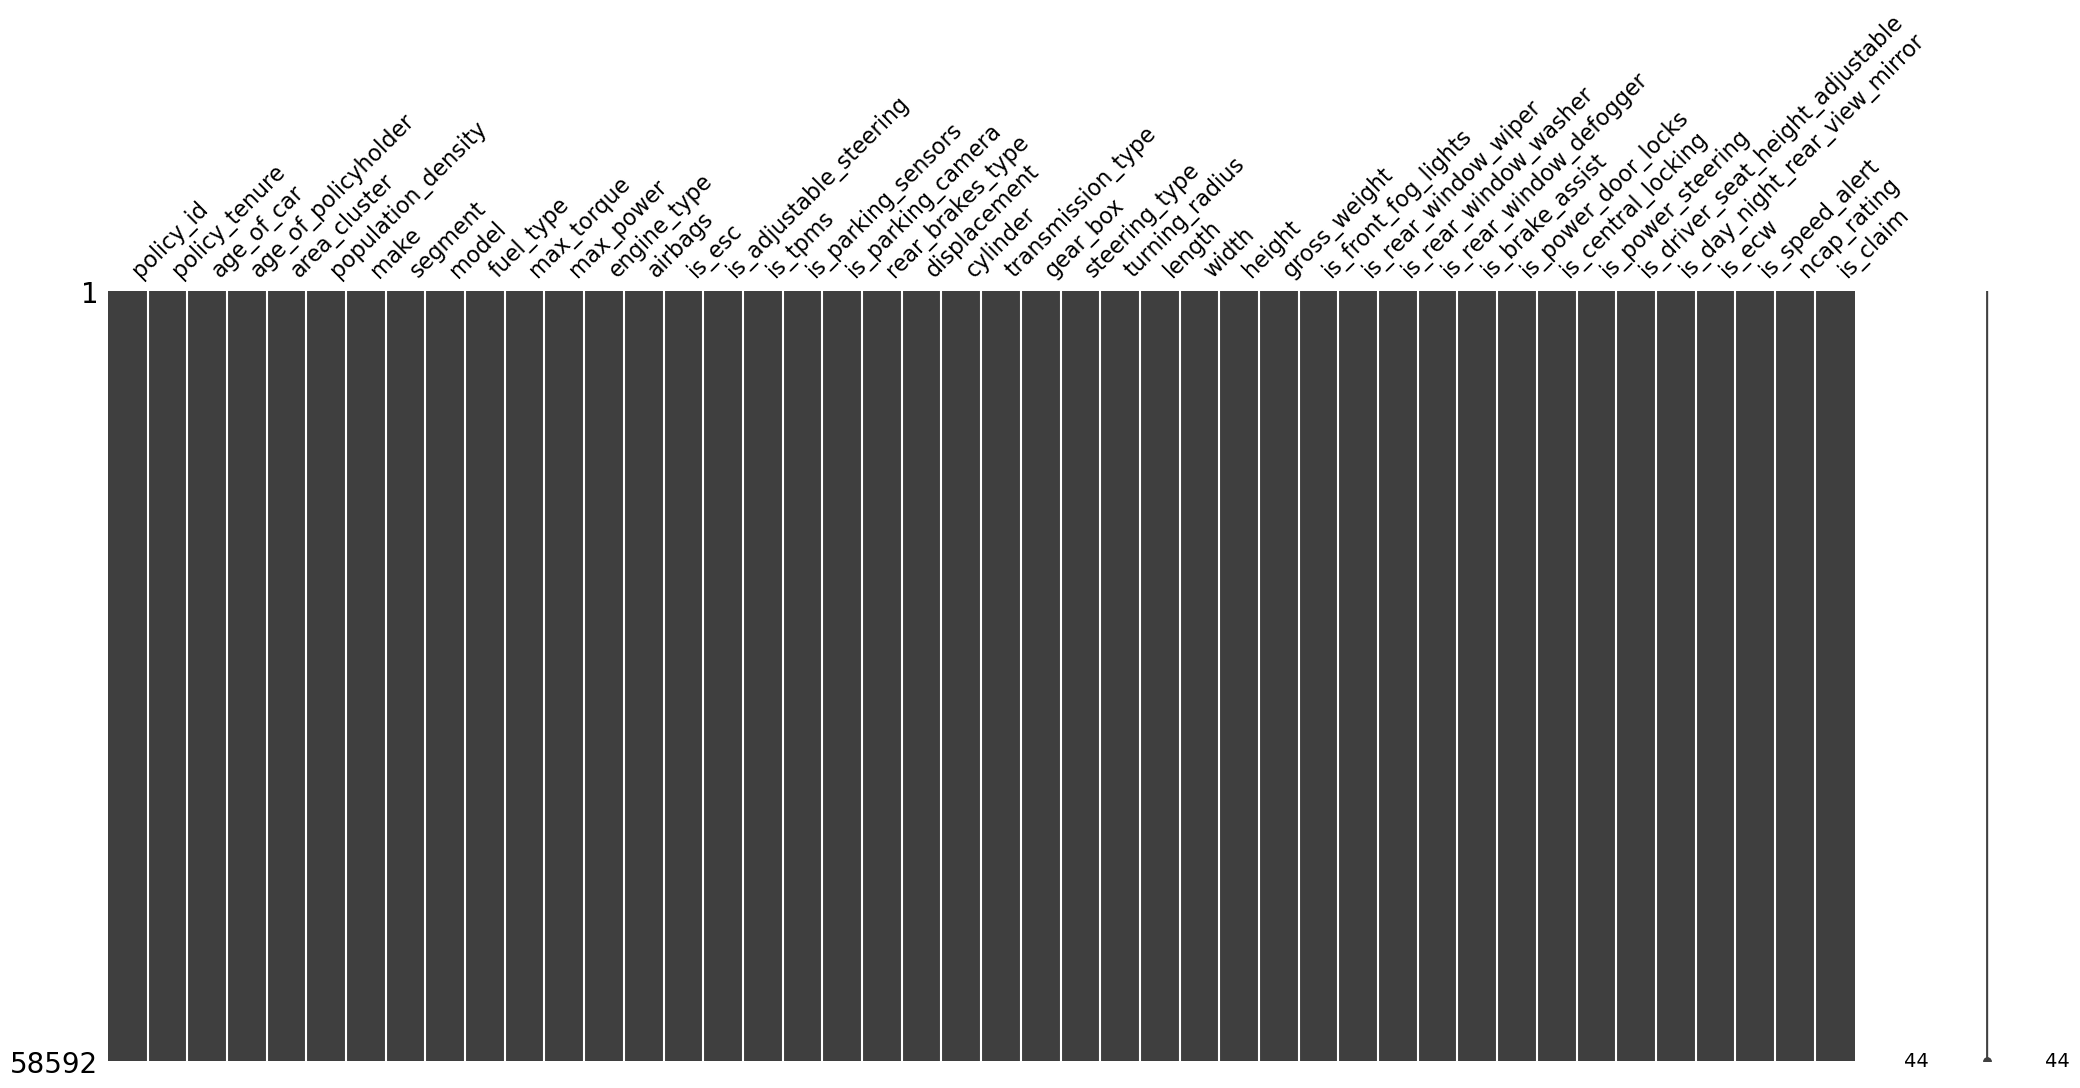

In [6]:
mn.matrix(df)

In [7]:
df.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [8]:
cat_cols = ['make','segment','model','fuel_type','engine_type','rear_brakes_type',
                    'transmission_type','steering_type']

num_cols = ['policy_tenure','age_of_car','age_of_policyholder','population_density',
                'max_power','displacement','gross_weight','turning_radius','length','width','height']

In [9]:
# Convert power column: remove text & extract numeric value
df['max_power'] = df['max_power'].str.extract('(\d+\.?\d*)').astype(float)

# Convert torque column: remove text & extract numeric value
df['max_torque'] = df['max_torque'].str.extract('(\d+\.?\d*)').astype(float)

## EDA

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

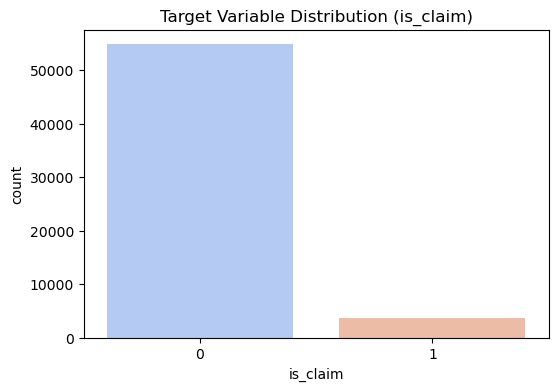

In [11]:
# TARGET VARIABLE DISTRIBUTION
plt.figure(figsize=(6,4))
sns.countplot(x="is_claim", data=df, palette="coolwarm")
plt.title("Target Variable Distribution (is_claim)")
plt.show()

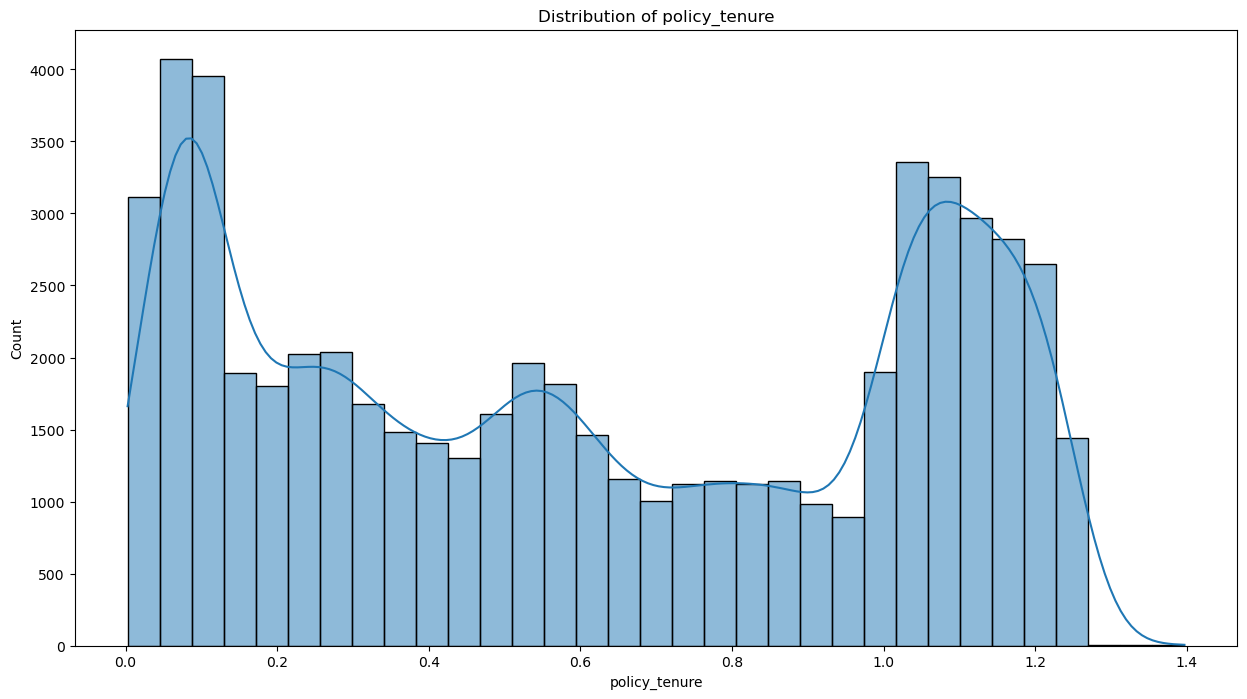

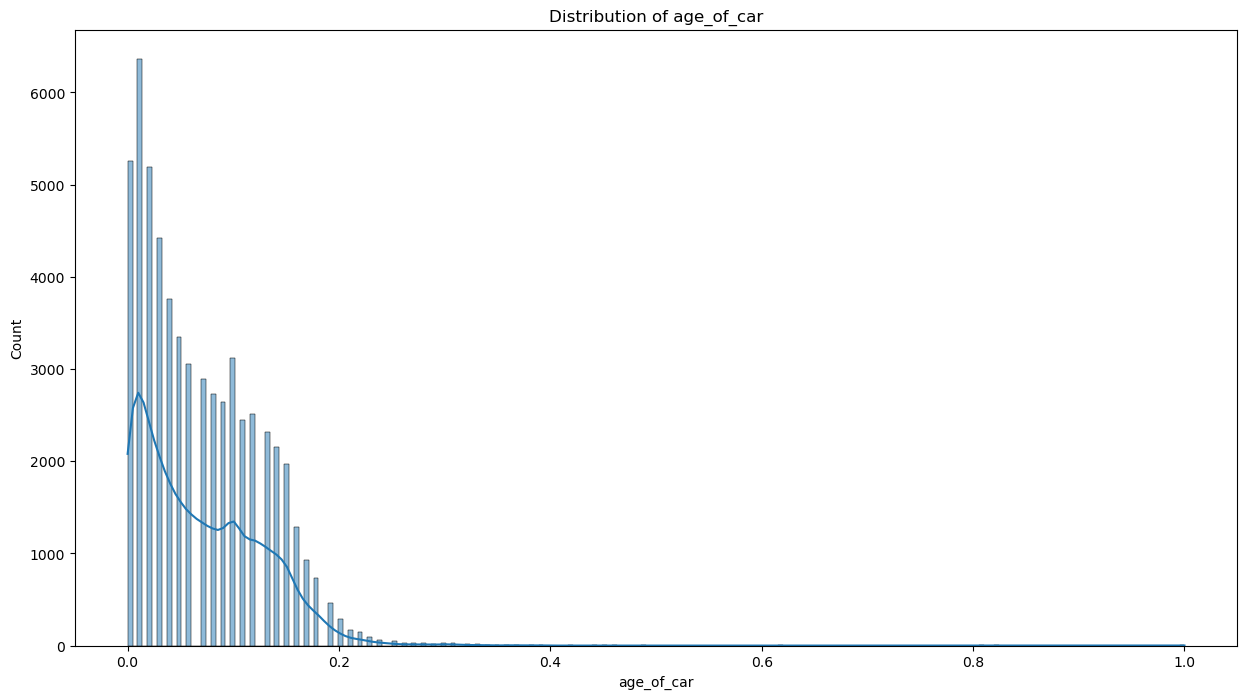

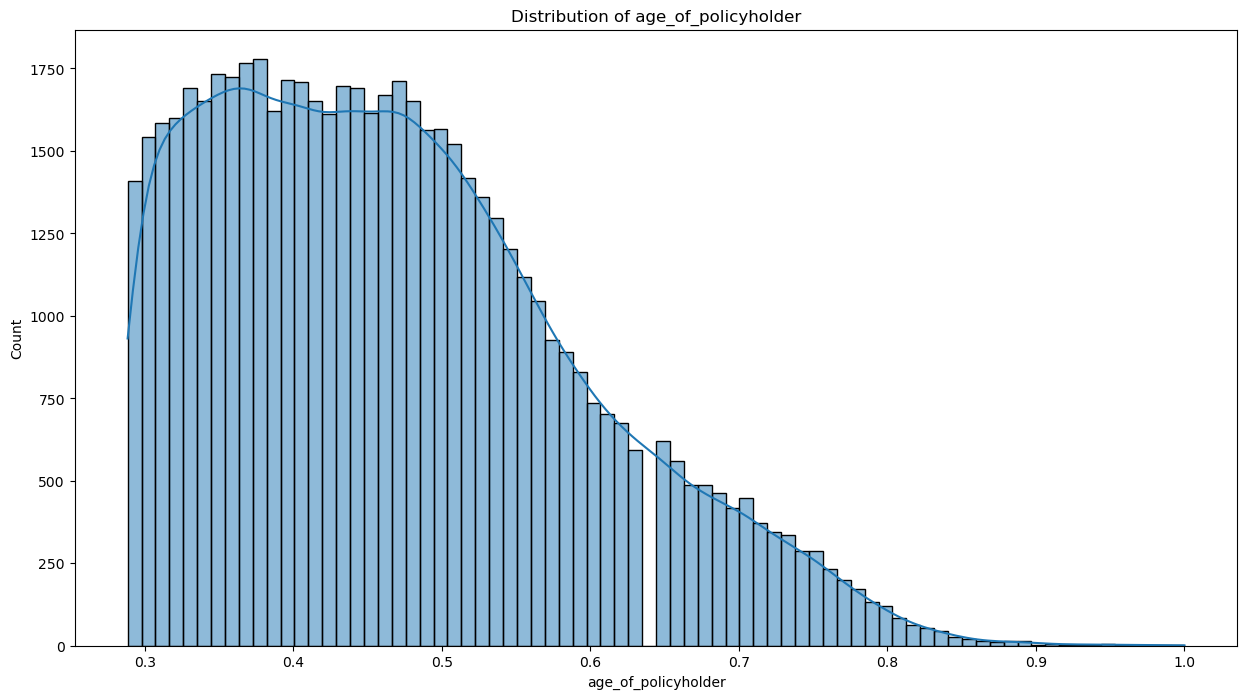

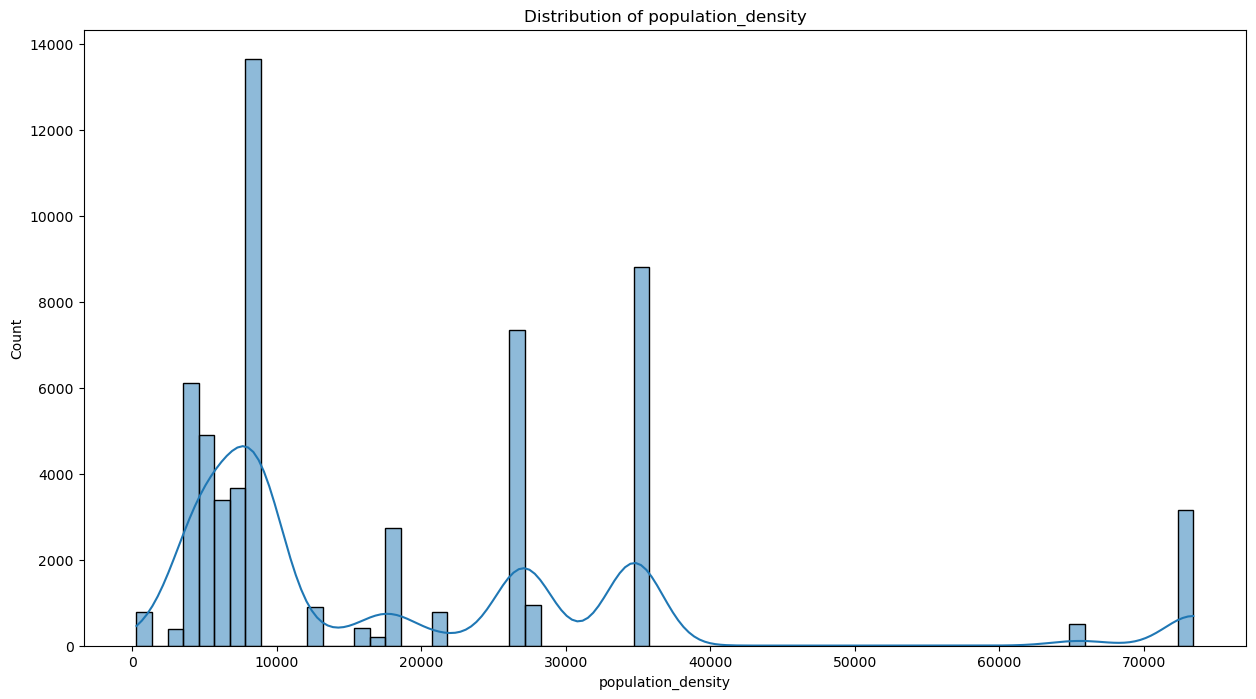

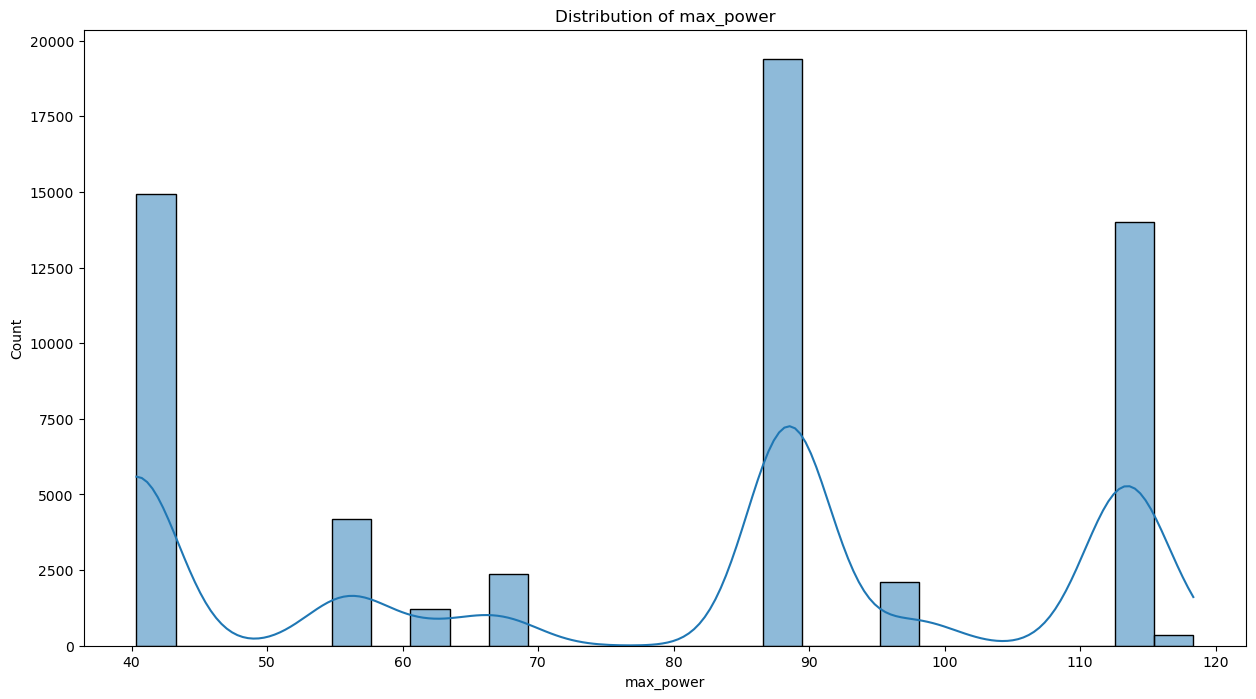

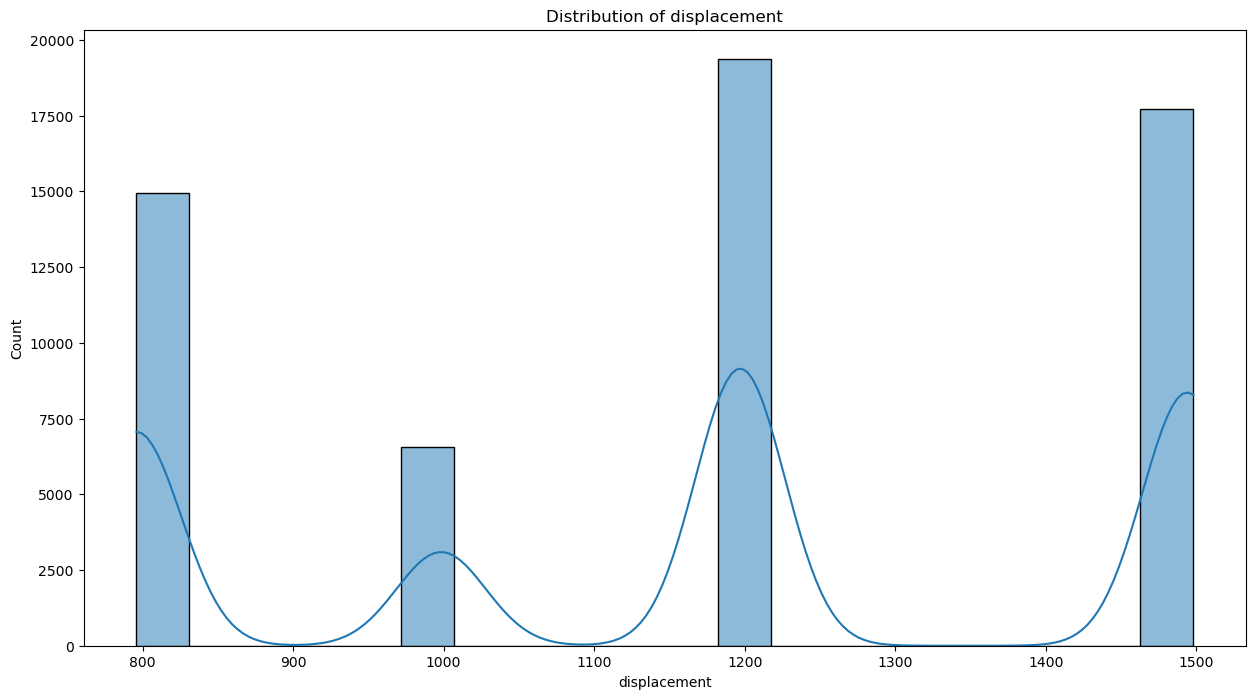

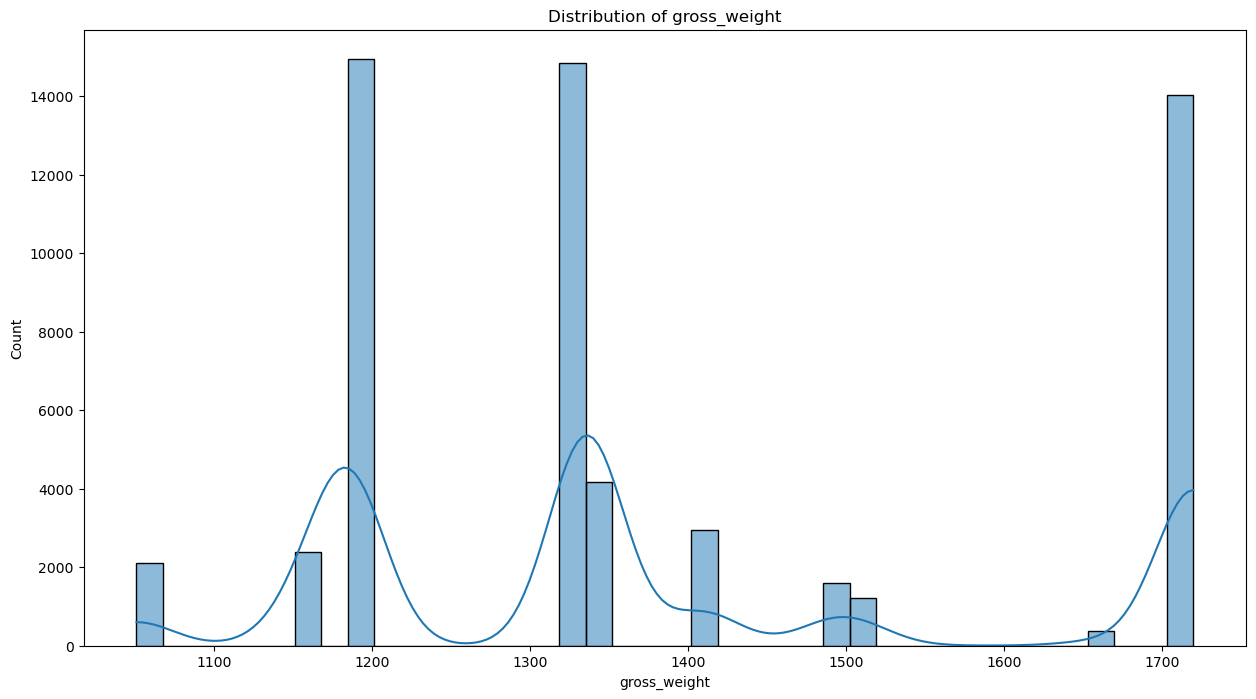

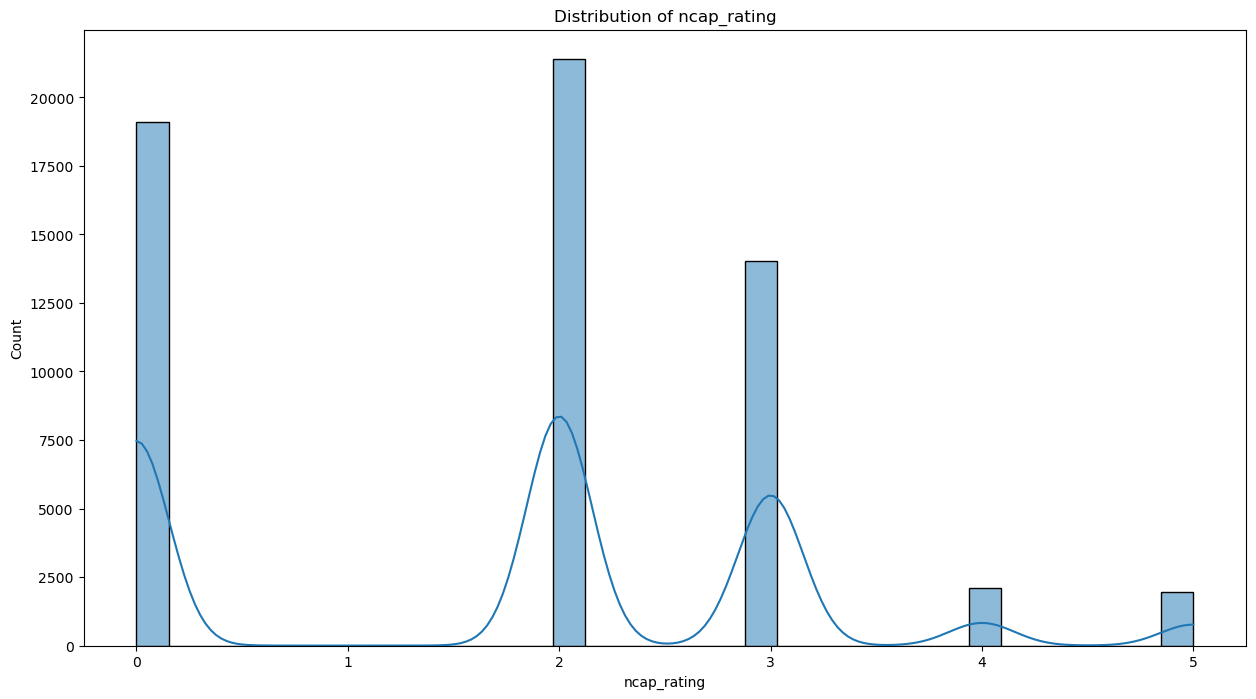

In [12]:
# NUMERICAL FEATURE DISTRIBUTIONS
dist_num_cols = ["policy_tenure","age_of_car","age_of_policyholder","population_density",
            "max_power","displacement","gross_weight","ncap_rating"]

for col in dist_num_cols:
    plt.figure(figsize=(15,8))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

## OUTLIERS CHECK

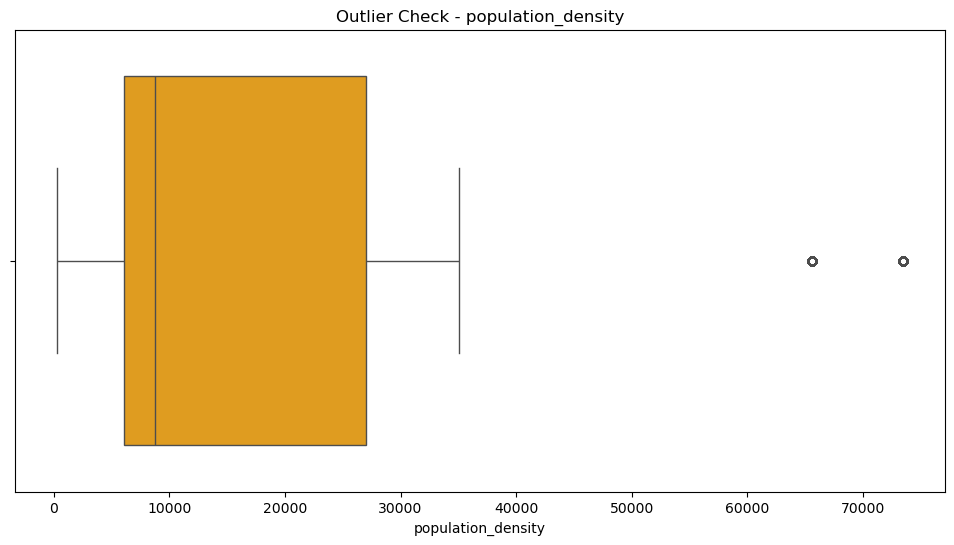

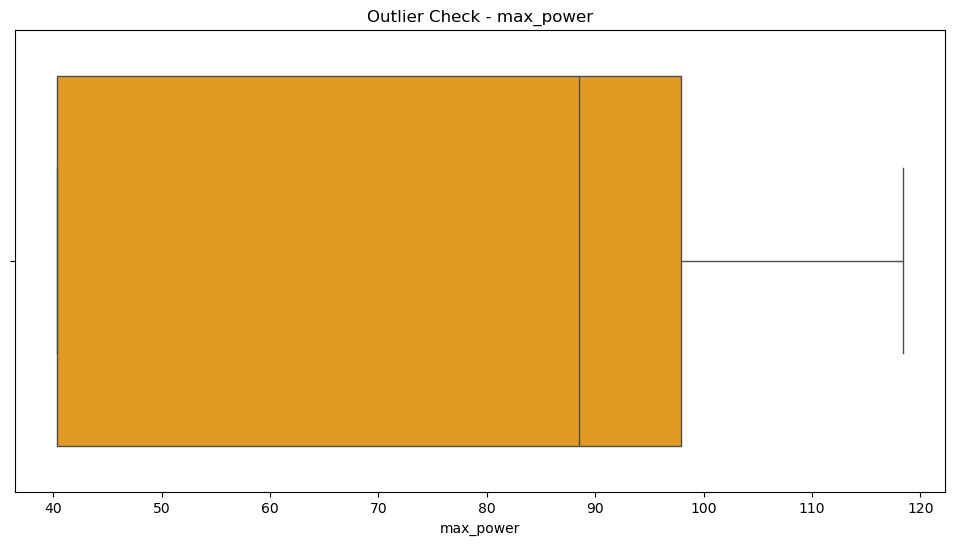

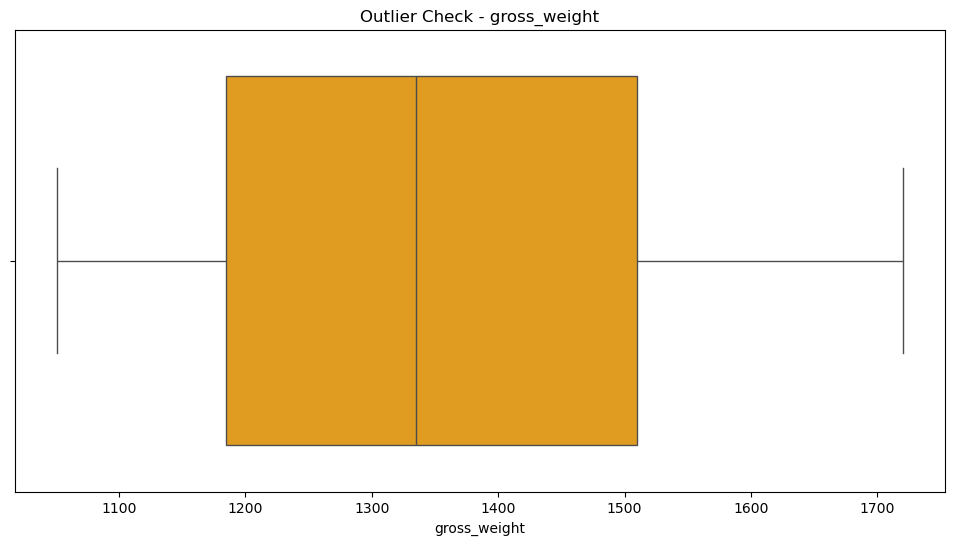

In [13]:
for col in ["population_density","max_power","gross_weight"]:
    plt.figure(figsize=(12,6))
    sns.boxplot(x=df[col], color="orange")
    plt.title(f"Outlier Check - {col}")
    plt.show()

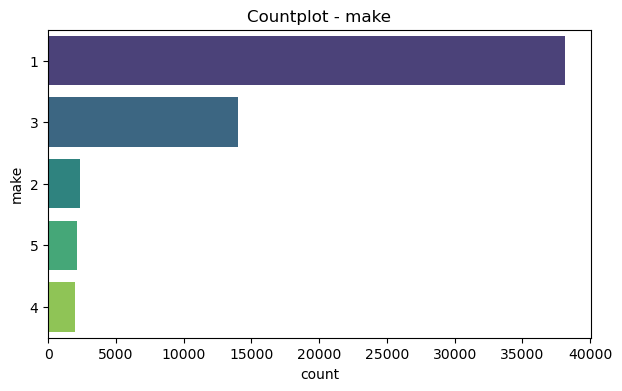

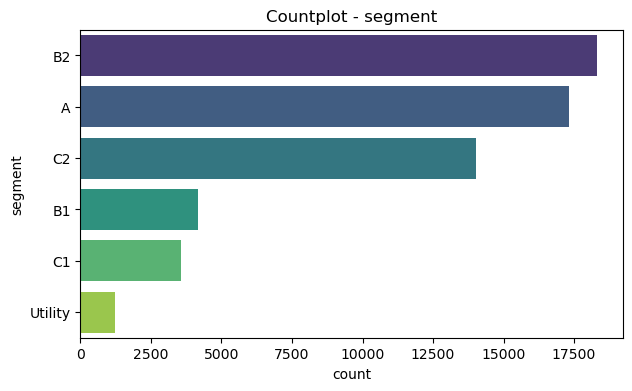

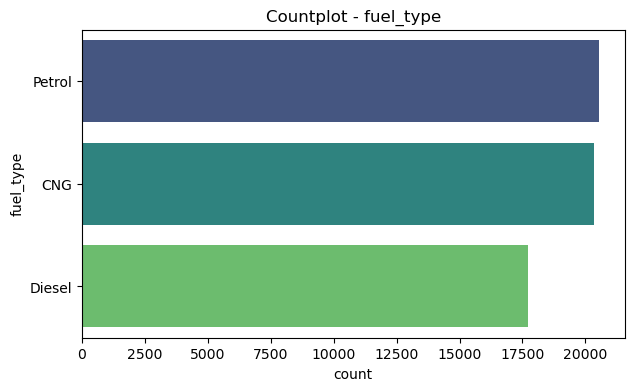

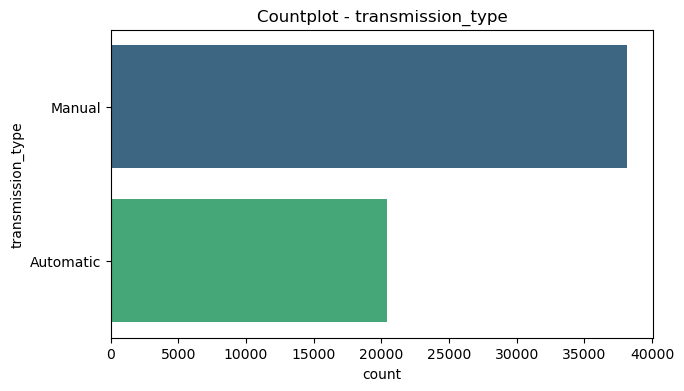

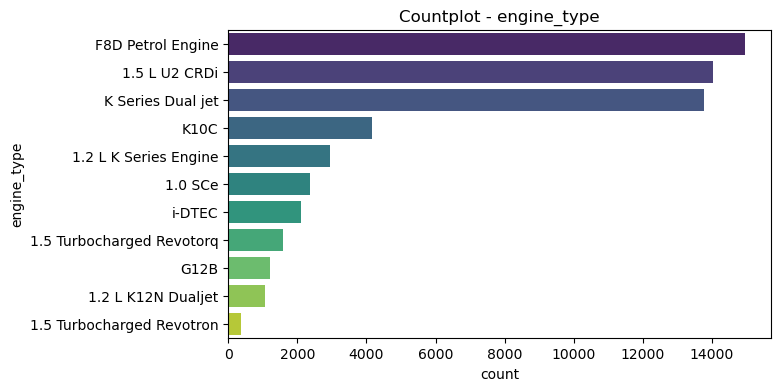

In [14]:
# CATEGORICAL FEATURE ANALYSIS
for col in ["make","segment","fuel_type","transmission_type","engine_type"]:
    plt.figure(figsize=(7,4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette="viridis")
    plt.title(f"Countplot - {col}")
    plt.show()

In [15]:
corr_target = df.select_dtypes(include=['int64','float64']).corr()
corr_target['is_claim'].sort_values(ascending=False)

is_claim               1.000000
policy_tenure          0.078747
age_of_policyholder    0.022435
cylinder               0.013434
width                  0.009947
max_power              0.007698
displacement           0.007678
length                 0.006495
max_torque             0.004294
gross_weight           0.003894
ncap_rating            0.003800
airbags                0.002789
turning_radius         0.002724
make                  -0.000456
gear_box              -0.000635
height                -0.002024
population_density    -0.017808
age_of_car            -0.028172
Name: is_claim, dtype: float64

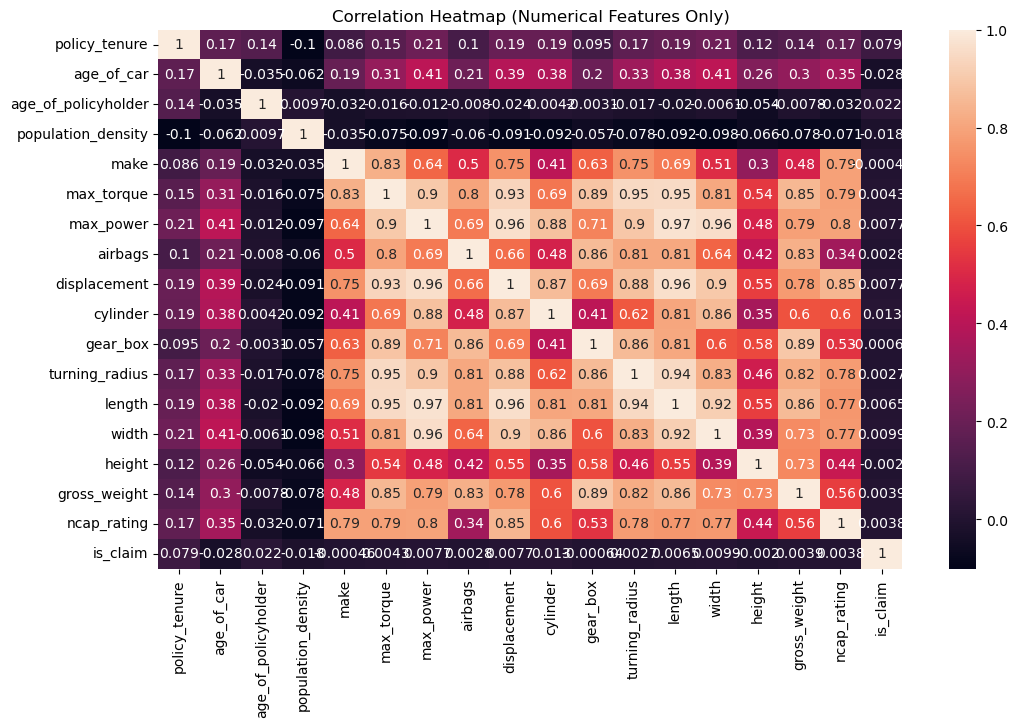

In [16]:
# CORRELATION ANALYSIS (HEATMAP)
plt.figure(figsize=(12,7))
sns.heatmap(corr_target,annot= True)
plt.title("Correlation Heatmap (Numerical Features Only)")
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [18]:
# SCALING & ENCODING
preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

In [19]:
X = df.drop(['is_claim','policy_id'], axis=1)  
y = df['is_claim']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(46873, 42) (46873,)
(11719, 42) (11719,)


In [21]:
X_train_enc = preprocess.fit_transform(X_train)
X_test_enc  = preprocess.transform(X_test)

In [22]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

X_train_sm, y_train_sm = sm.fit_resample(X_train_enc, y_train)

print("Before:", y_train.value_counts())
print("After SMOTE:", y_train_sm.value_counts())

Before: is_claim
0    43875
1     2998
Name: count, dtype: int64
After SMOTE: is_claim
0    43875
1    43875
Name: count, dtype: int64


## DECISION TREE

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

dt = DecisionTreeClassifier(
    max_depth=6,                 # prevent overfitting
    min_samples_split=50,
    min_samples_leaf=25,
    class_weight='balanced',
    random_state=42
)

dt.fit(X_train_sm, y_train_sm)

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,50
,min_samples_leaf,25
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


Decision Tree Classification Report (Default Prediction):
              precision    recall  f1-score   support

           0       0.96      0.51      0.67     10969
           1       0.08      0.65      0.15       750

    accuracy                           0.52     11719
   macro avg       0.52      0.58      0.41     11719
weighted avg       0.90      0.52      0.63     11719

Decision Tree ROC-AUC: 0.5947952715227762


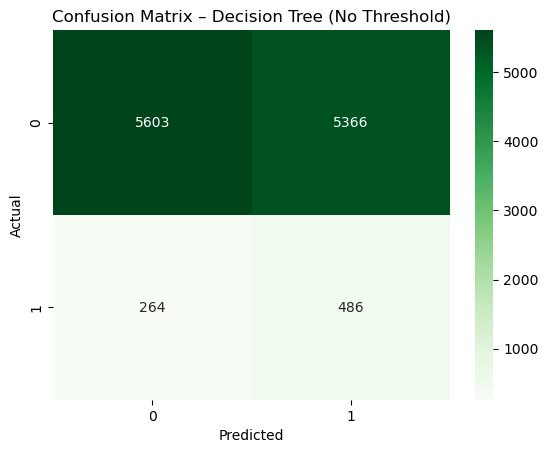

In [24]:
y_pred_dt = dt.predict(X_test_enc)

# Probabilities only for ROC-AUC
y_prob_dt = dt.predict_proba(X_test_enc)[:, 1]

print("Decision Tree Classification Report (Default Prediction):")
print(classification_report(y_test, y_pred_dt))

print("Decision Tree ROC-AUC:", roc_auc_score(y_test, y_prob_dt))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix – Decision Tree (No Threshold)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## RANDOM FOREST

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

rf = RandomForestClassifier(
    n_estimators=300,
    class_weight='balanced',
    random_state=42
)

rf.fit(X_train_sm, y_train_sm)
y_pred_rf = rf.predict(X_test_enc)
y_prob_rf = rf.predict_proba(X_test_enc)[:,1]

print("🔹 Random Forest Results")
print("--------------------------------")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))


🔹 Random Forest Results
--------------------------------
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     10969
           1       0.10      0.07      0.08       750

    accuracy                           0.90     11719
   macro avg       0.52      0.51      0.51     11719
weighted avg       0.88      0.90      0.89     11719

ROC-AUC: 0.5946692193150395


## XGBOOST

In [27]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    learning_rate=0.1,
    max_depth=6,
    n_estimators=300,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]),  # imbalance fix
    random_state=42
)

xgb.fit(X_train_sm, y_train_sm)
y_pred_xgb = xgb.predict(X_test_enc)
y_prob_xgb = xgb.predict_proba(X_test_enc)[:,1]

print("🔹 XGBoost Results")
print("--------------------------------")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))


🔹 XGBoost Results
--------------------------------
              precision    recall  f1-score   support

           0       0.96      0.49      0.64     10969
           1       0.08      0.67      0.15       750

    accuracy                           0.50     11719
   macro avg       0.52      0.58      0.40     11719
weighted avg       0.90      0.50      0.61     11719

ROC-AUC: 0.6193350350989152


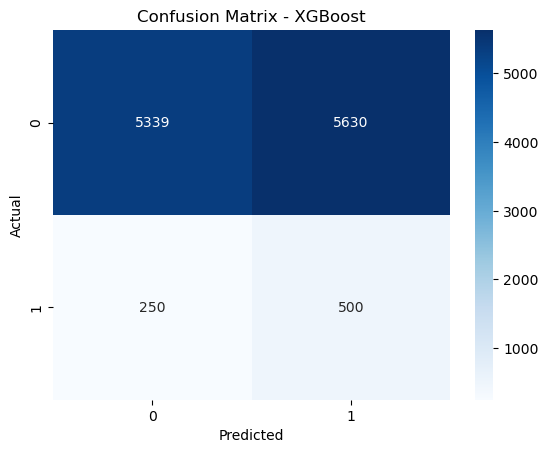

In [28]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [29]:
print("RF AUC:", roc_auc_score(y_test, y_prob_rf))
print("XGB AUC:", roc_auc_score(y_test, y_prob_xgb))

RF AUC: 0.5946692193150395
XGB AUC: 0.6193350350989152


## THRESHOLDS

In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = [0.20, 0.25, 0.30, 0.35, 0.40, 0.45]

for t in thresholds:
    y_pred_thresh = (y_prob_xgb >= t).astype(int)
    
    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    
    print(f"Threshold: {t}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")
    print("-" * 30)

Threshold: 0.2
Precision: 0.072
Recall: 0.921
F1 Score: 0.133
------------------------------
Threshold: 0.25
Precision: 0.074
Recall: 0.900
F1 Score: 0.137
------------------------------
Threshold: 0.3
Precision: 0.076
Recall: 0.865
F1 Score: 0.139
------------------------------
Threshold: 0.35
Precision: 0.077
Recall: 0.825
F1 Score: 0.141
------------------------------
Threshold: 0.4
Precision: 0.079
Recall: 0.785
F1 Score: 0.144
------------------------------
Threshold: 0.45
Precision: 0.080
Recall: 0.728
F1 Score: 0.144
------------------------------


              precision    recall  f1-score   support

           0       0.96      0.37      0.54     10969
           1       0.08      0.79      0.14       750

    accuracy                           0.40     11719
   macro avg       0.52      0.58      0.34     11719
weighted avg       0.91      0.40      0.51     11719



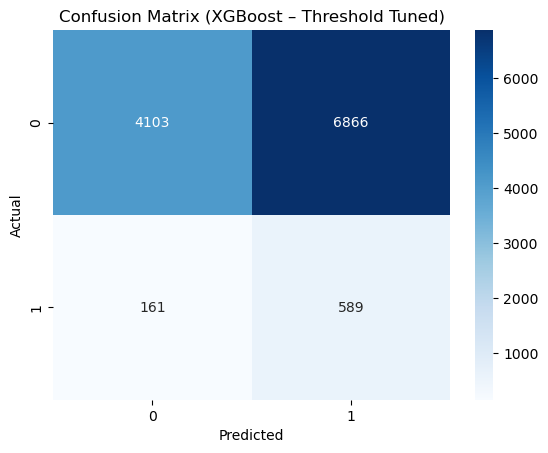

In [32]:
best_threshold = 0.40
y_pred_final = (y_prob_xgb >= best_threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_final))

cm = confusion_matrix(y_test, y_pred_final)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (XGBoost – Threshold Tuned)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## HYPER-PARAMETER TUNING

In [33]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

xgb_base = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]),
    random_state=42
)

param_dist = {
    'n_estimators': [200, 300, 400],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.7, 0.8],
    'colsample_bytree': [0.6, 0.7, 0.8],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 3, 5]
}

In [34]:
random_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist,
    n_iter=20,              # fast + acceptable
    scoring='roc_auc',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_sm, y_train_sm)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


,estimator,"XGBClassifier...ree=None, ...)"
,param_distributions,"{'colsample_bytree': [0.6, 0.7, ...], 'gamma': [0, 0.1, ...], 'learning_rate': [0.01, 0.05, ...], 'max_depth': [3, 4, ...], ...}"
,n_iter,20
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [35]:
print("Best Parameters:")
print(random_search.best_params_)

print("Best CV ROC-AUC:")
print(random_search.best_score_)

Best Parameters:
{'subsample': 0.7, 'n_estimators': 400, 'min_child_weight': 5, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.7}
Best CV ROC-AUC:
0.9724322699978085


In [36]:
best_xgb = random_search.best_estimator_

y_prob_tuned = best_xgb.predict_proba(X_test_enc)[:,1]
y_pred_tuned = (y_prob_tuned >= 0.40).astype(int)  # use tuned threshold

from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred_tuned))
print("Test ROC-AUC:", roc_auc_score(y_test, y_prob_tuned))

              precision    recall  f1-score   support

           0       0.96      0.41      0.57     10969
           1       0.08      0.77      0.15       750

    accuracy                           0.43     11719
   macro avg       0.52      0.59      0.36     11719
weighted avg       0.91      0.43      0.55     11719

Test ROC-AUC: 0.6230552162153948


In [37]:
print("Baseline XGBoost ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))
print("Tuned XGBoost ROC-AUC   :", roc_auc_score(y_test, y_prob_tuned))


Baseline XGBoost ROC-AUC: 0.6193350350989152
Tuned XGBoost ROC-AUC   : 0.6230552162153948


In [38]:
# Get expanded feature names from preprocessing pipeline
feature_names = preprocess.get_feature_names_out()

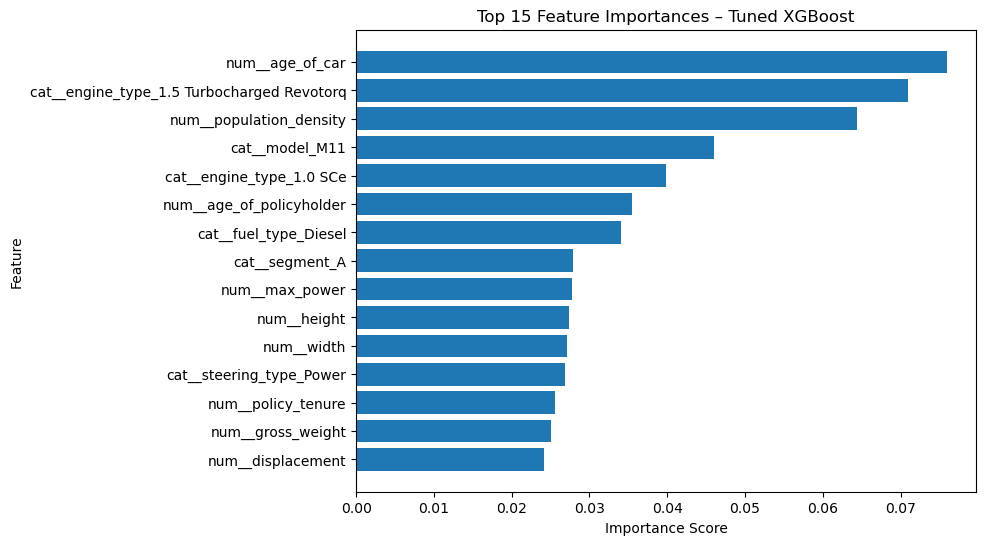

In [39]:
# Extract feature importance from tuned model
importances = best_xgb.feature_importances_

feat_imp_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Plot top 15
top15 = feat_imp_df.head(15)

plt.figure(figsize=(8,6))
plt.barh(top15['feature'], top15['importance'])
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importances – Tuned XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

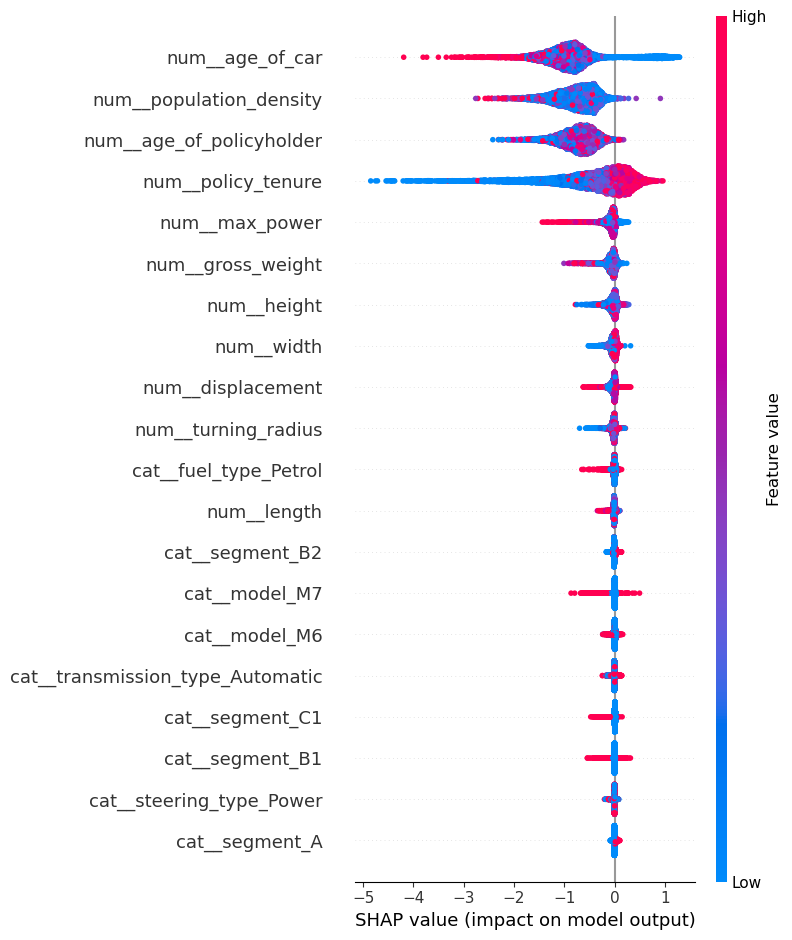

In [41]:
import shap

# Create SHAP explainer
explainer = shap.TreeExplainer(best_xgb)

# Compute SHAP values (use a subset if slow)
shap_values = explainer.shap_values(X_test_enc)

# Summary plot
shap.summary_plot(
    shap_values,
    X_test_enc,
    feature_names=feature_names
)

In [42]:
import joblib

# Save the tuned XGBoost model
joblib.dump(best_xgb, "insurance_claim_xgboost_model.pkl")

# Save preprocessing pipeline
joblib.dump(preprocess, "insurance_claim_preprocess.pkl")

# Save the chosen threshold
best_threshold = 0.40
joblib.dump(best_threshold, "insurance_claim_threshold.pkl")

['insurance_claim_threshold.pkl']